## Loan Status Prediction using Support Vector Machine

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

<b>Data Collection and Processing</b>

In [5]:
dataset = pd.read_csv('dataset.csv')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
dataset.shape

(614, 13)

In [9]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# Number of missing values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Dropping the null values
dataset = dataset.dropna()

In [13]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the NULL values has been dropped.

<b>Label Encoding</b>

In [16]:
# Replacing Y and N using 1 and 0
dataset.replace({"Loan_Status" : {'N' : 0, 'Y' : 1}})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [17]:
dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

We should replace the 3+ to a particular value like 4.

In [19]:
dataset = dataset.replace(to_replace = '3+', value = 4)

In [20]:
dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<b> Data Visualization </b>

<Axes: xlabel='Education', ylabel='count'>

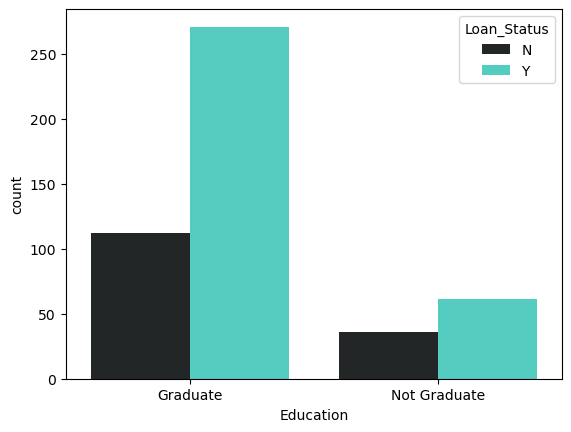

In [23]:
# Education vs Loan Status

sns.countplot(x = 'Education', hue = 'Loan_Status', color = 'turquoise', data = dataset)

Loan approved for Graduated people are more than those who are not Graduated.

<Axes: xlabel='Married', ylabel='count'>

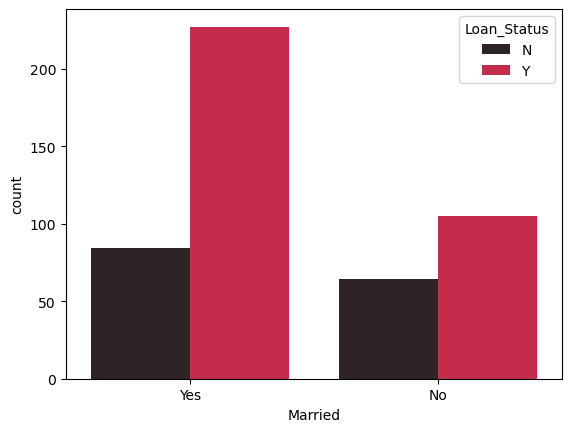

In [25]:
# Married vs Loan Status

sns.countplot(x = 'Married', hue = 'Loan_Status', color = 'crimson', data = dataset)

<b> Converting categorical values into numerical values</b>

In [27]:
dataset.replace({'Married' : {'No' : 0, 'Yes' : 1}, 'Gender' : {'Male' : 1, 'Female' : 0}, 'Self_Employed' : {'Yes' : 1, 'No' : 0}, 
                'Property_Area' : {'Rural' : 0, 'Semiurban' : 1, 'Urban' : 2}, 'Education' : {'Graduate' : 1, 'Not Graduate' : 0}}, inplace = True)

In [28]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [29]:
# Seperating the data and label
X = dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = dataset['Loan_Status']

In [51]:
print(Y)

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object


In [53]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

<b> Splitting the data into train data and test data </b>

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


<b> Training the Model </b>

In [66]:
from sklearn import svm

In [70]:
classifier = svm.SVC(kernel = "linear")

In [72]:
# Training the SVM model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

<b> Model Evaluation </b>

In [75]:
# Accuracy Score 
from sklearn.metrics import accuracy_score 

X_train_pred = classifier.predict(X_train)

training_data_acc = accuracy_score(X_train_pred, Y_train)


In [77]:
print("Accuracy Score on training data: ", training_data_acc)

Accuracy Score on training data:  0.7893518518518519


We need to evaluate the accuracy on Test data.

In [80]:
X_test_pred = classifier.predict(X_test)

test_data_acc = accuracy_score(X_test_pred, Y_test)


In [82]:
print("Accuracy Score on testing data: ", test_data_acc)

Accuracy Score on testing data:  0.8333333333333334
